## Introduction
In this tutorial, we will learn about isotonic regression, which is a non-parametric regression technique that finds a non-decreasing approximation of a function while minimizing the mean squared error on the training data. We will use scikit-learn, a popular machine learning library in Python, to implement isotonic regression and compare it with linear regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

## Generate Data
Next, we will generate some data to use for our regression. We will create a non-linear monotonic trend with homoscedastic uniform noise.

In [2]:
n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50.0 * np.log1p(np.arange(n))

## Fit Isotonic and Linear Regression Models
We will now fit both the isotonic and linear regression models to the generated data.

In [3]:
ir = IsotonicRegression(out_of_bounds="clip")
y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

LinearRegression()

## Plot Results
Finally, we will plot the results of both regression models to visualize how well they fit the data.

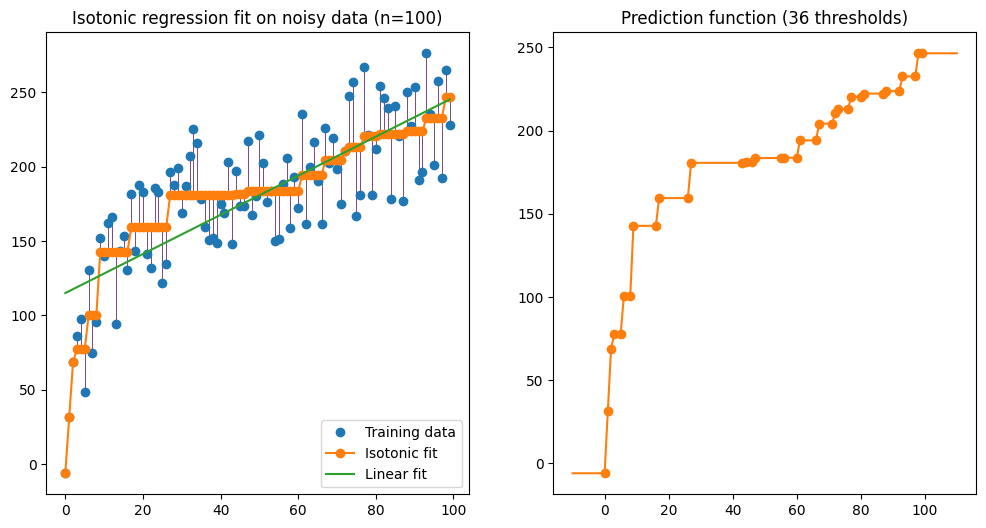

In [5]:
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

ax0.plot(x, y, "C0.", markersize=12)
ax0.plot(x, y_, "C1.-", markersize=12)
ax0.plot(x, lr.predict(x[:, np.newaxis]), "C2-")
ax0.add_collection(lc)
ax0.legend(("Training data", "Isotonic fit", "Linear fit"), loc="lower right")
ax0.set_title("Isotonic regression fit on noisy data (n=%d)" % n)

x_test = np.linspace(-10, 110, 1000)
ax1.plot(x_test, ir.predict(x_test), "C1-")
ax1.plot(ir.X_thresholds_, ir.y_thresholds_, "C1.", markersize=12)
ax1.set_title("Prediction function (%d thresholds)" % len(ir.X_thresholds_))

plt.show()

## Summary
In this tutorial, we learned about isotonic regression, a non-parametric regression technique that finds a non-decreasing approximation of a function while minimizing the mean squared error on the training data. We also implemented isotonic regression using scikit-learn and compared it with linear regression.